# 从头开始搭建神经网络和训练神经网络

## step1-搜集数据

((200, 2), (200,))

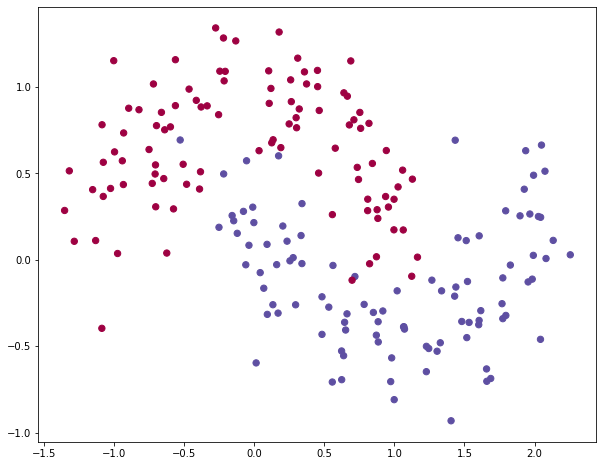

In [6]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

np.random.seed(0)
X, Y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)
X.shape, Y.shape

## step1 - 构建一个baseline模型


In [9]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

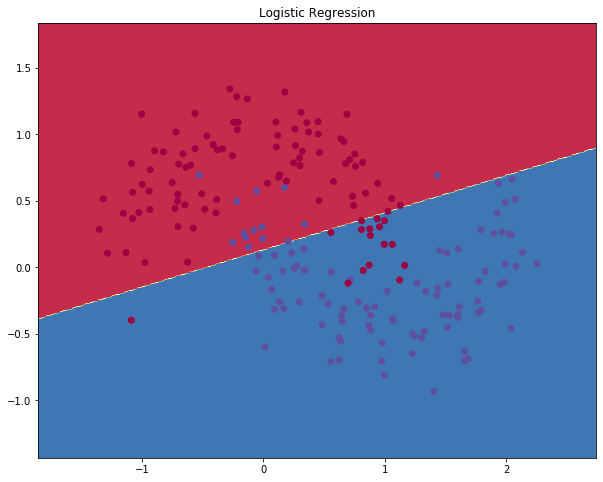

In [10]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y)

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

这个图的横轴zhongzhou是x的两个特征，中间的斜线是逻辑回归算法从训练数据中学习到的决策边界。可以看到有一些样本被决策边界分到了错误的类别里面。

## step2 - 构造和训练一个神经网络

构造一个如下图所示的，两层的神经网络

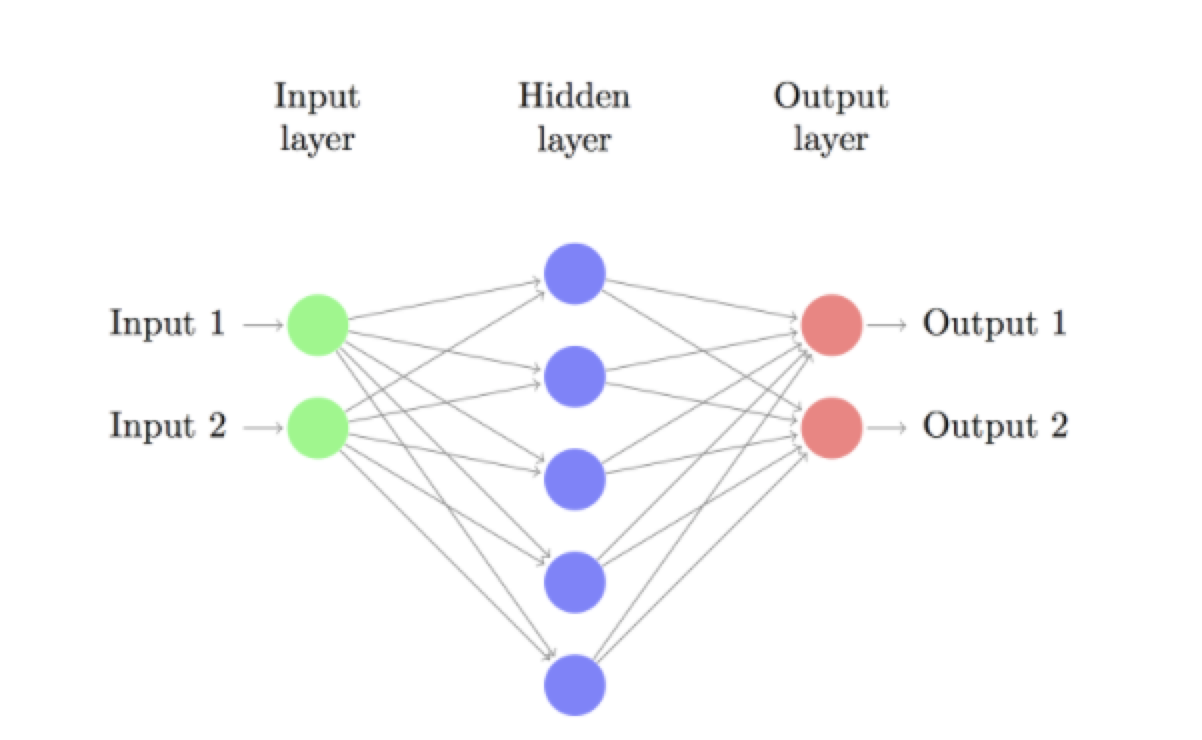

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def build_nn(X, W1, W2):
    # x.shape = <n_samples, m_features>
    # W1.shape = <hidden units, m_features >
    # W2.shape = <n_outputs, units of hidden layer >
    # hidden_layer.shape = <n_samples, hidden units >
    hidden_layer = np.dot(X, W1.T)
    
    # out_put.shape = <n_samples,1 >
    logits = np.dot(hidden_layer, W2.T)
    prediction = sigmoid(logits)
    return prediction
    
    
def cross_entropy(predction, y):
    if y > 0:
        return  - np.log(predction)
    else:
        return np.log(predction)

def total_loss(predictions, Y):
    loss_list = []
    for i in range(n_samples):
        loss = cross_entropy(predictions[i], Y[i])
        loss_list.append(loss[0])
    loss_total = sum(loss_list)
    return loss_total

    

In [16]:
n_samples, m_features = X.shape
x = X[1]
hidden_units = 3

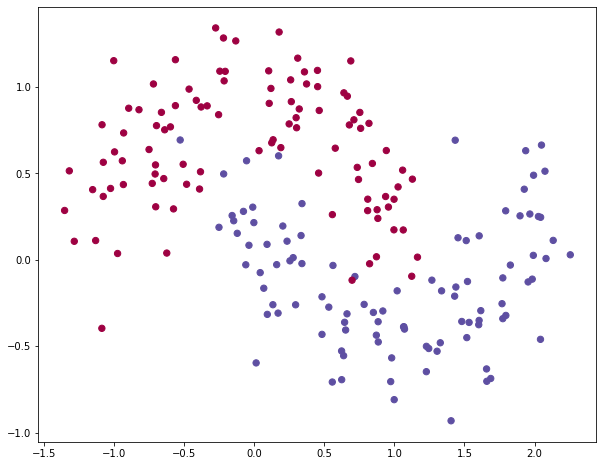

In [5]:
plt.scatter(X[:,0], X[:,1], s=40, c=Y, cmap=plt.cm.Spectral)

In [21]:
# initianize W1,W2

n_samples, m_features = X.shape

hidden_units = 5

np.random.seed(0)

W1 = np.random.randn(hidden_units, m_features) / np.sqrt(hidden_units)
W2 = np.random.randn(2, hidden_units) / np.sqrt(hidden_units)


### 向前传播&计算局部梯度



In [32]:
# np.exp(-logits).sum(axis=0).shape
(logits / (np.exp(-logits).sum(axis=0))).shape

(2, 200)

In [68]:
# forward propagation

h = W1.dot(X.T)

# out_put.shape = <n_samples,1 >
logits = W2.dot(h)
probs = np.exp(-logits) / (np.exp(-logits).sum(axis=0)).reshape(1, -1)
loss = - np.log(probs)
loss[:, Y<=0] *= -1

D_probs = 1 / probs
D_probs[:, Y<=0] *= -1  

D_logits = D_probs.dot((probs * (1 - probs)).T)

D_W2 = D_logits.dot(h)

ValueError: shapes (2,2) and (5,200) not aligned: 2 (dim 1) != 5 (dim 0)

In [60]:
(probs * (1 - probs)).shape, D_probs.shape

((2, 200), (2, 200))

### 向前传播



### 向后传播


d_loss/d_prob = - 1 * label / prob

d_prob/d_logits = (1 - logits) * logits

d_logits/d_W2 = hidden_layer

d_hidden_layer / d_W1 = X

d_loss / d_W2 =  d_loss/d_prob * d_prob/d_logits * d_logits / d_W =  - 1 * label / prob *  (1 - logits) * logits * hidden_layer

In [43]:
# back propagation
loss_total = total_loss(predictions, Y)
Y = Y.reshape((-1, 1))

Dloss_Dprob =  - 1 * 2 * (1 - Y) / prob
dProb = Dloss_Dprob.T

Dprob_Dlogits = (prob * (1 - prob)).T
dLogits = np.dot(Dprob_Dlogits, dProb.T)

dLogits_dW2 = hidden_layer

dW2 = np.dot(dLogits_dW2.T, dLogits) 
W2 = W2 - dW2


NameError: name 'predictions' is not defined

In [208]:
dLogits_dW2.shape, dLogits.shape

((5, 200), (1, 1))

In [193]:
dLogits_dHidden_layer = W2
dHiddenlayer = np.dot(dLogits_dHidden_layer, dLogits.T)

dHiddenlayer_dW1 = X
dW1 =  np.dot(dHiddenlayer_dW1.T, dHiddenlayer)
W1 = W1 - dW1

ValueError: shapes (2,200) and (5,200) not aligned: 200 (dim 1) != 5 (dim 0)

In [74]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hdim = 3
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [75]:
np.random.seed(0)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))

In [80]:
# Forward propagation
y = Y
z1 = X.dot(W1) + b1
a1 = np.tanh(z1)
z2 = a1.dot(W2) + b2
exp_scores = np.exp(z2)
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


# Backpropagation
# delta3 是损失函数对z2的导数， shape = <n_samples, 2>
delta3 = probs
delta3[range(num_examples), y] -= 1

# dW2是损失函数对W2的导数，等于损失对z2的偏导数，乘积z2对W2的局部误差a1，dW2的形状为(hiddenlayers, outputs)
dW2 = (a1.T).dot(delta3)

db2 = np.sum(delta3, axis=0, keepdims=True)

# delta2是损失函数对z1的导，的形状为(n_sample, 3)
delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
dW1 = np.dot(X.T, delta2)
db1 = np.sum(delta2, axis=0)

# Add regularization terms (b1 and b2 don't have regularization terms)
dW2 += reg_lambda * W2
dW1 += reg_lambda * W1

# Gradient descent parameter update
W1 += -epsilon * dW1
b1 += -epsilon * db1
W2 += -epsilon * dW2
b2 += -epsilon * db2

# Assign new parameters to the model
model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}

# Optionally print the loss.
# This is expensive because it uses the whole dataset, so we don't want to do it too often.
# print("Loss after iteration  %f" %( calculate_loss(model)))


In [87]:
delta2.shape, dW2.shape, dW1.shape, b1.shape, b2.shape

((200, 3), (3, 2), (2, 3), (1, 3), (1, 2))